<a href="https://colab.research.google.com/github/HiimanshuSherawat/Uber_Eda/blob/main/Uber_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [20]:
path="/content/My Uber Drives - 2016.csv"

In [21]:
df = pd.read_csv(path)

In [22]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [23]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [24]:
df.shape

(1156, 7)

In [25]:
pip install -U pandas-profiling

     |████████████████████████████████| 261 kB 28.4 MB/s 
     |████████████████████████████████| 102 kB 11.8 MB/s 
     |████████████████████████████████| 675 kB 46.4 MB/s 
     |████████████████████████████████| 596 kB 50.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 10.9 MB 58.4 MB/s 
     |████████████████████████████████| 303 kB 55.4 MB/s 
     |████████████████████████████████| 3.1 MB 46.6 MB/s 
     |████████████████████████████████| 812 kB 49.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=1a180932a4f0e54da16cf4048ae61b77435437181b284fb9b9b34052e9378c04
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=76337acfa5a5d21e5455c5016e51ee90b66e64c9ed9d680b1c76b34d023f1fb4


In [26]:
import pandas_profiling
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
df.drop_duplicates(inplace=True)

In [44]:
df.drop(df.index[[751, 761, 798, 807]], inplace=True)

In [45]:
df.columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']

In [46]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [47]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1150 non-null   datetime64[ns]
 1   END_DATE    1150 non-null   datetime64[ns]
 2   CATEGORY    1150 non-null   object        
 3   START       1150 non-null   object        
 4   STOP        1150 non-null   object        
 5   MILES       1151 non-null   float64       
 6   PURPOSE     652 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 71.9+ KB


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


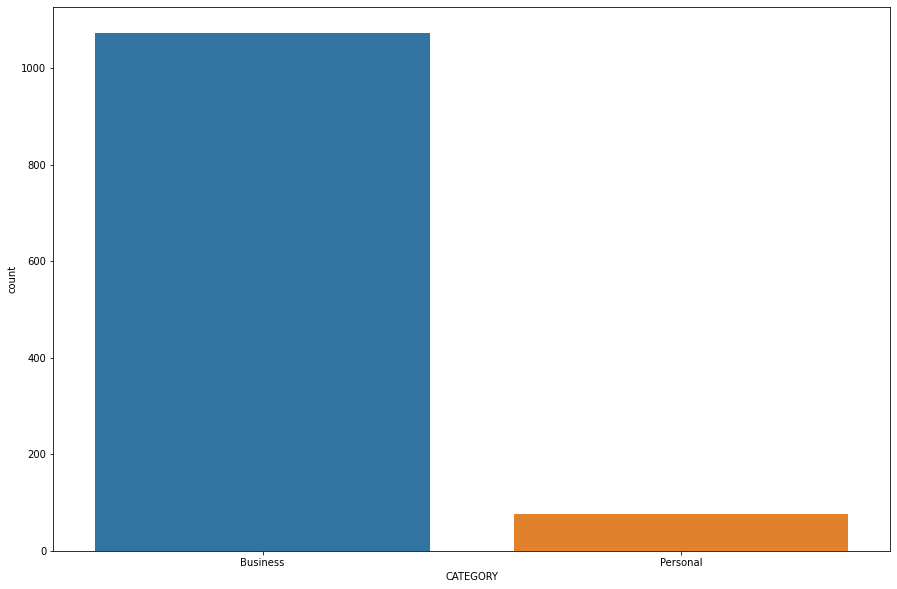

In [48]:
plt.figure(figsize=(15, 10))
sns.countplot(df['CATEGORY']);

In [49]:
start_labels = df.START.value_counts().nlargest(10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


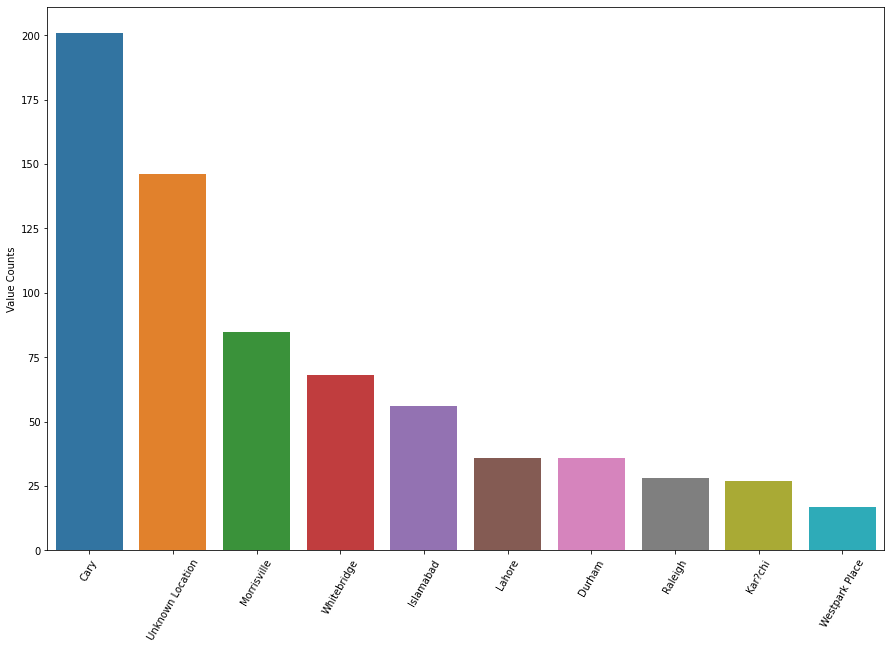

In [50]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=60)
sns.barplot(start_labels.index, start_labels);
plt.ylabel('Value Counts');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


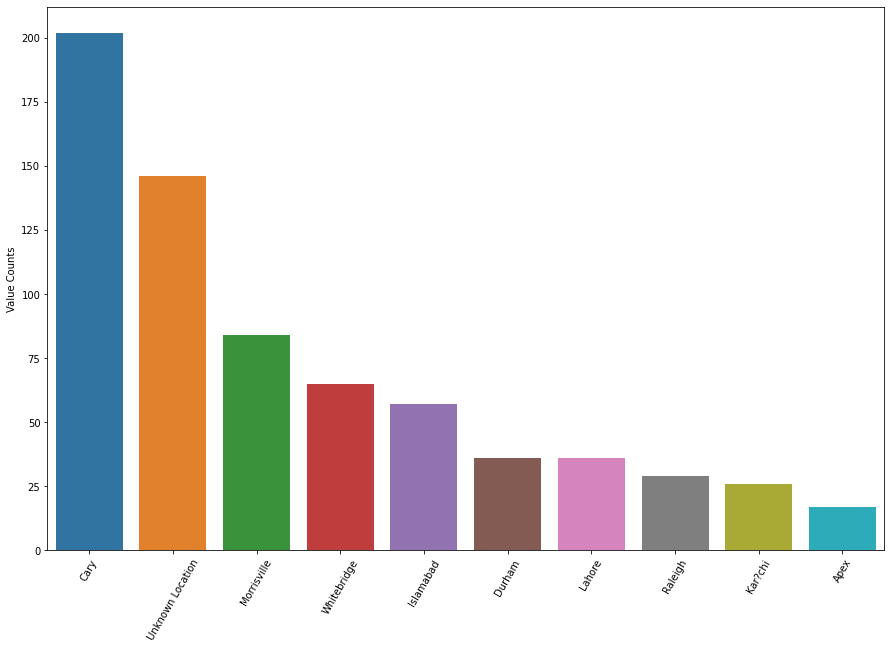

In [51]:
stop_labels = df.STOP.value_counts().nlargest(10)
plt.figure(figsize=(15, 10))
plt.xticks(rotation=60)
sns.barplot(stop_labels.index, stop_labels);
plt.ylabel('Value Counts');

In [52]:
miles_dic = {}

for i in df.MILES:
    if i < 10:
        if '0-10 miles' not in miles_dic:
            miles_dic['0-10 miles'] = [i]
        else:
            miles_dic['0-10 miles'].append(i)
            
    elif i >= 10 and i < 20:
        if '10-20 miles' not in miles_dic:
            miles_dic['10-20 miles'] = [i]
        else:
            miles_dic['10-20 miles'].append(i)
            
    elif i >= 20 and i < 30:
        if '20-30 miles' not in miles_dic:
            miles_dic['20-30 miles'] = [i]
        else:
            miles_dic['20-30 miles'].append(i)
            
    elif i >= 30 and i < 40:
        if '30-40 miles' not in miles_dic:
            miles_dic['30-40 miles'] = [i]
        else:
            miles_dic['30-40 miles'].append(i)
            
    elif i >= 40 and i < 50:
        if '40-50 miles' not in miles_dic:
            miles_dic['40-50 miles'] = [i]
        else:
            miles_dic['40-50 miles'].append(i)
    else:
        if 'Above 50 miles' not in miles_dic:
            miles_dic['Above 50 miles'] = [i]
        else:
            miles_dic['Above 50 miles'].append(i)

In [53]:
len_miles = []
for key in miles_dic:
    len_miles.append((key, len(miles_dic[key])))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


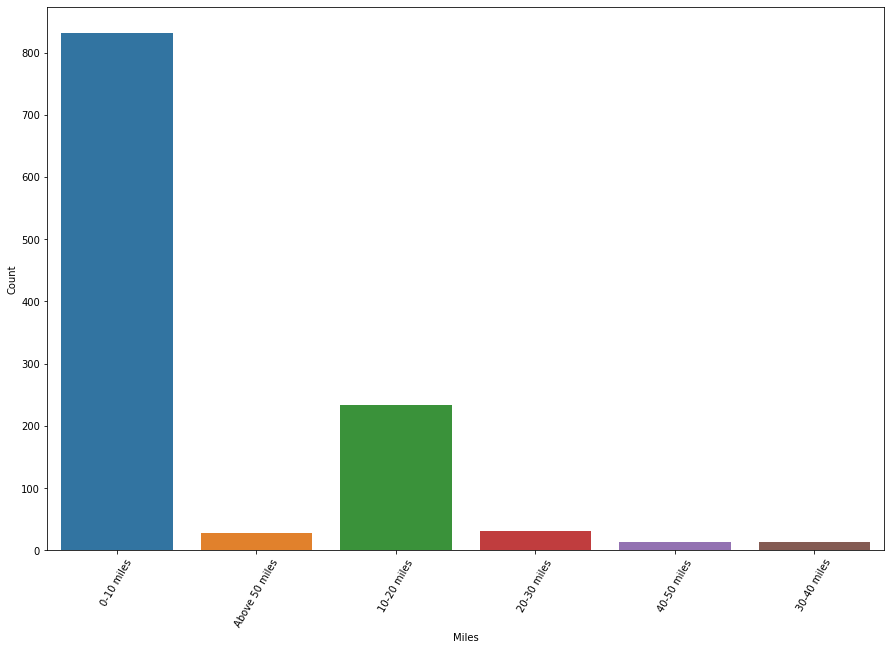

In [54]:
a, b = [], []
for i, j in len_miles:
    a.append(i)
    b.append(j)

plt.figure(figsize=(15, 10))
plt.xticks(rotation=60)
sns.barplot(a, b)
plt.xlabel('Miles')
plt.ylabel('Count');

In [55]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [56]:
''' Now we want to know how many trips were made on Day time and how many on Night time '''
t = pd.to_datetime(['18:00:00']).time

In [59]:
df['DAY'] = df.START_DATE.dt.weekday

In [60]:
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fir', 5: 'Sat', 6: 'Sun'
}
df['DAY'] = df['DAY'].map(day_label)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


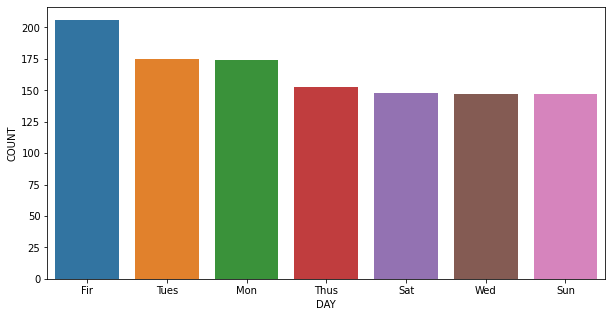

In [61]:
day_label = df.DAY.value_counts()
'''bar plot of days'''
plt.figure(figsize=(10, 5))
sns.barplot(day_label.index, day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT');

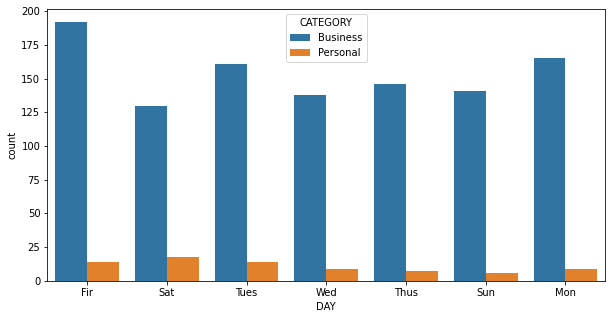

In [62]:
''' count plot of day'''
plt.figure(figsize=(10, 5))
sns.countplot(hue='CATEGORY', x='DAY', data=df);